In [ ]:
"""These data is specifically for the weekend portion, Paul's data is for the weekdays"""

# LIST OF IMPORTS

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import datetime
import logging
import glob
import os
import seaborn as sns

%matplotlib inline

# ACTUAL START OF PROGRAM

In [5]:
def is_weekday(date):
    """Takes a string or datetime.date object and returns True if it is a weekday and False if it is a weekend"""
    if type(date) != datetime.date:
        try:
            date = dateutil.parser.parse(date).date()
        except TypeError:
            logging.warning('Invalid input, cannot convert to datetime.')
            
    if date.weekday() < 5:
        weekday = True
    else:
        weekday = False
    return weekday

# CLEANING CODE

In [6]:
def add_date_time(row):
    date_time = row['DATE'] + ' ' + row['TIME']
    return dateutil.parser.parse(date_time)

In [8]:
"""All files were stored on my computer """

path = r'/Users/Dangaia/Documents/Metis/chi17_ds2/projects/01-benson/Benson_Files' 

all_files = glob.glob(os.path.join(path, "*.txt"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
mta_data = pd.concat(df_from_each_file, ignore_index=True)

In [10]:
mta_data['DATE_TIME']= mta_data['DATE'] + ' ' + mta_data['TIME']

In [11]:
def clean_date(x):
    return dateutil.parser.parse(x)

In [12]:
mta_data.rename(columns=lambda x: x.strip(), inplace=True)

In [14]:
del mta_data['TIME']
del mta_data['DIVISION']

In [15]:
mta_data['IS_WEEKDAY'] = mta_data['DATE'].apply(is_weekday)

In [16]:
mta_data['DATE'] = mta_data['DATE'].apply(clean_date);

In [17]:
mta_data[mta_data['IS_WEEKDAY'] == False]

,C/A,UNIT,SCP,STATION,LINENAME,DATE,DESC,ENTRIES,EXITS,DATE_TIME,IS_WEEKDAY
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,2015-02-28,REGULAR,5023331,1701900,02/28/2015 03:00:00,False
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,2015-02-28,REGULAR,5023340,1701906,02/28/2015 07:00:00,False
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,2015-02-28,REGULAR,5023421,1701986,02/28/2015 11:00:00,False
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,2015-02-28,REGULAR,5023619,1702052,02/28/2015 15:00:00,False
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,2015-02-28,REGULAR,5024000,1702109,02/28/2015 19:00:00,False
5,A002,R051,02-00-00,LEXINGTON AVE,NQR456,2015-02-28,REGULAR,5024211,1702130,02/28/2015 23:00:00,False
6,A002,R051,02-00-00,LEXINGTON AVE,NQR456,2015-03-01,REGULAR,5024269,1702142,03/01/2015 03:00:00,False
7,A002,R051,02-00-00,LEXINGTON AVE,NQR456,2015-03-01,REGULAR,5024275,1702150,03/01/2015 07:00:00,False
8,A002,R051,02-00-00,LEXINGTON AVE,NQR456,2015-03-01,REGULAR,5024316,1702205,03/01/2015 11:00:00,False
9,A002,R051,02-00-00,LEXINGTON AVE,NQR456,2015-03-01,REGULAR,5024498,1702260,03/01/2015 15:00:00,False


In [19]:
mta_data['TURNSTILE'] = mta_data['C/A'] + ' ' + mta_data['SCP']

In [20]:
mta_data.query("DESC == 'REGULAR'", inplace = True)

In [21]:
del mta_data['C/A']
del mta_data['SCP']
del mta_data['UNIT']

In [22]:
mta_data['NUM_LINES'] = mta_data['LINENAME'].apply(lambda x: len(x))

In [23]:
mta_data2 = mta_data.groupby('STATION')['TURNSTILE'].nunique()
mta_data2 = mta_data2.to_frame()
mta_data2.reset_index(inplace=True)

In [24]:
mta_data.sort_values(['STATION']).head()

,STATION,LINENAME,DATE,DESC,ENTRIES,EXITS,DATE_TIME,IS_WEEKDAY,TURNSTILE,NUM_LINES
4267902,1 AV,L,2016-05-01,REGULAR,369578535,386431846,05/01/2016 00:00:00,False,H007 00-03-00,1
3105353,1 AV,L,2016-03-25,REGULAR,7568807,18459450,03/25/2016 16:00:00,True,H008 01-00-02,1
3105352,1 AV,L,2016-03-25,REGULAR,7568479,18458769,03/25/2016 12:00:00,True,H008 01-00-02,1
3105351,1 AV,L,2016-03-25,REGULAR,7568369,18458233,03/25/2016 08:00:00,True,H008 01-00-02,1
3105350,1 AV,L,2016-03-25,REGULAR,7568333,18457975,03/25/2016 04:00:00,True,H008 01-00-02,1


In [26]:
mta_data = pd.merge(mta_data,mta_data2,on='STATION', how='left')

mta_data.rename(columns={'TURNSTILE_x': 'TURNSTILE', 'TURNSTILE_y': 'NUM_TURNSTILES'}, inplace=True)

In [130]:
mta_data_sorted = mta_data.sort_values(['TURNSTILE', 'DATE'], ascending=[True, True])
mta_data_sorted['ENTRIES_NEXT'] = mta_data_sorted['ENTRIES'].shift(-1)
mta_data_sorted['NEW_ENTRIES'] = mta_data_sorted['ENTRIES_NEXT'] - mta_data_sorted['ENTRIES']

mta_data_sorted['EXITS_NEXT'] = mta_data_sorted['EXITS'].shift(-1)
mta_data_sorted['NEW_EXITS'] = mta_data_sorted['EXITS_NEXT'] - mta_data_sorted['EXITS']

mta_data_sorted['TURNSTILE_NEXT'] = mta_data_sorted['TURNSTILE'].shift(-1)
mta_data_sorted['TURNSTILE_NOT_SAME'] = mta_data_sorted['TURNSTILE'] != mta_data_sorted['TURNSTILE_NEXT']

In [131]:
mta_data_sorted = mta_data_sorted.query('TURNSTILE_NOT_SAME == False')
mta_data_sorted = mta_data_sorted.query('NEW_ENTRIES > 0')
mta_data_sorted = mta_data_sorted.query('NEW_EXITS > 0')
mta_data_sorted = mta_data_sorted.query('STATION != "TIMES SQ-42 ST"')

In [31]:
mta_data_sorted = mta_data_sorted.query('NEW_ENTRIES < 10000')
mta_data_sorted = mta_data_sorted.query('NEW_EXITS < 10000')

In [73]:
mta_data_sorted['FOOT_TRAFFIC'] = mta_data_sorted['NEW_ENTRIES'] + mta_data_sorted['NEW_EXITS']

In [74]:
mta_weekend = mta_data_sorted.query("IS_WEEKDAY == False")
mta_weekend = mta_weekend.sort_values(['FOOT_TRAFFIC', 'STATION'], ascending=[False, False])

In [76]:
mta_foot_traffic_avg = mta_weekend.groupby('STATION')['FOOT_TRAFFIC'].mean()
mta_foot_traffic_avg = mta_foot_traffic_avg.to_frame()
mta_foot_traffic_avg.reset_index(inplace= True)
mta_foot_traffic_avg.sort_values('FOOT_TRAFFIC', ascending = False)

,STATION,FOOT_TRAFFIC
220,BEDFORD AV,698.284015
221,BEDFORD AVE,690.797445
21,14 ST-UNION SQ,621.187505
548,W 4 ST-WASH SQ,610.158971
567,YORK ST,591.883036
0,1 AV,581.948582
153,8 AVE,577.071057
507,ROOSEVELT AVE,561.606070
1,1 AVE,560.683884
152,8 AV,540.191445


In [77]:
mta_weekend = pd.merge(mta_weekend,mta_foot_traffic_avg,on='STATION', how='left', suffixes=['', '_AVG'])

mta_weekend = mta_weekend.sort_values(['FOOT_TRAFFIC', 'STATION'], ascending=[False, False])
mta_weekend = mta_weekend.sort_values('FOOT_TRAFFIC_AVG', ascending=False).drop_duplicates('STATION', keep='first')

# PLOTTING DATA

In [83]:
mta_weekend

,STATION,LINENAME,DATE,DESC,ENTRIES,EXITS,DATE_TIME,IS_WEEKDAY,TURNSTILE,NUM_LINES,NUM_TURNSTILES,ENTRIES_NEXT,NEW_ENTRIES,EXITS_NEXT,NEW_EXITS,TURNSTILE_NEXT,TURNSTILE_NOT_SAME,FOOT_TRAFFIC,FOOT_TRAFFIC_AVG
391828,BEDFORD AV,L,2016-04-17,REGULAR,563855,722187,04/17/2016 00:00:00,False,H009 00-06-05,1,13,563966.0,111.0,722384.0,197.0,H009 00-06-05,False,308.0,698.284015
186374,BEDFORD AVE,L,2015-05-24,REGULAR,19379490,9598784,05/24/2015 00:00:00,False,H009 00-03-03,1,13,19379856.0,366.0,9598922.0,138.0,H009 00-03-03,False,504.0,690.797445
1024316,14 ST-UNION SQ,LNQR456,2016-03-20,REGULAR,1798181,1161163,03/20/2016 01:00:00,False,A034 03-06-01,7,38,1798220.0,39.0,1161188.0,25.0,A034 03-06-01,False,64.0,621.187505
21610,W 4 ST-WASH SQ,ABCDEFM,2017-04-01,REGULAR,20021881,9686603,04/01/2017 13:00:00,False,N083 01-03-02,7,19,20022601.0,720.0,9686994.0,391.0,N083 01-03-02,False,1111.0,610.158971
4683,YORK ST,F,2016-05-14,REGULAR,11824467,6230668,05/14/2016 13:00:00,False,N530 00-00-01,1,3,11825458.0,991.0,6231284.0,616.0,N530 00-00-01,False,1607.0,591.883036
131225,1 AV,L,2017-02-25,REGULAR,369881696,386814736,02/25/2017 15:00:00,False,H007 00-03-00,1,10,369881928.0,232.0,386815100.0,364.0,H007 00-03-00,False,596.0,581.948582
149325,8 AVE,ACEL,2015-05-03,REGULAR,11518910,7022286,05/03/2015 21:00:00,False,H001 00-00-02,4,18,11519325.0,415.0,7022433.0,147.0,H001 00-00-02,False,562.0,577.071057
43807,ROOSEVELT AVE,EFMR7,2015-03-28,REGULAR,2879836,3520953,03/28/2015 20:00:00,False,N324 00-00-03,5,22,2880025.0,189.0,3521663.0,710.0,N324 00-00-03,False,899.0,561.606070
587917,1 AVE,L,2015-05-24,REGULAR,4659537,384450,05/24/2015 16:00:00,False,H007 00-03-02,1,10,4659712.0,175.0,384475.0,25.0,H007 00-03-02,False,200.0,560.683884
15655,8 AV,N,2016-04-03,REGULAR,199447,319149,04/03/2016 13:00:00,False,D002 00-00-02,1,18,199958.0,511.0,319850.0,701.0,D002 00-00-02,False,1212.0,540.191445


In [58]:
mta_data.shape

(6166237, 11)

In [59]:
mta_weekend['NEW_ENTRIES'].max()

1492.0

In [97]:
def merge_station(v):
    if v == 'BEDFORD AV':
        v = 'BEDFORD AVE'    
    elif v == '2 AV':
        v = '2 AVE'
    elif v == '1 AV':
        v = '1 AVE'
    else:
        v = v
    return v


mta_weekend['STATION'] = mta_weekend['STATION'].apply(merge_station)
mta_weekend

,STATION,LINENAME,DATE,DESC,ENTRIES,EXITS,DATE_TIME,IS_WEEKDAY,TURNSTILE,NUM_LINES,NUM_TURNSTILES,ENTRIES_NEXT,NEW_ENTRIES,EXITS_NEXT,NEW_EXITS,TURNSTILE_NEXT,TURNSTILE_NOT_SAME,FOOT_TRAFFIC,FOOT_TRAFFIC_AVG
391828,BEDFORD AVE,L,2016-04-17,REGULAR,563855,722187,04/17/2016 00:00:00,False,H009 00-06-05,1,13,563966.0,111.0,722384.0,197.0,H009 00-06-05,False,308.0,698.284015
186374,BEDFORD AVE,L,2015-05-24,REGULAR,19379490,9598784,05/24/2015 00:00:00,False,H009 00-03-03,1,13,19379856.0,366.0,9598922.0,138.0,H009 00-03-03,False,504.0,690.797445
1024316,14 ST-UNION SQ,LNQR456,2016-03-20,REGULAR,1798181,1161163,03/20/2016 01:00:00,False,A034 03-06-01,7,38,1798220.0,39.0,1161188.0,25.0,A034 03-06-01,False,64.0,621.187505
21610,W 4 ST-WASH SQ,ABCDEFM,2017-04-01,REGULAR,20021881,9686603,04/01/2017 13:00:00,False,N083 01-03-02,7,19,20022601.0,720.0,9686994.0,391.0,N083 01-03-02,False,1111.0,610.158971
4683,YORK ST,F,2016-05-14,REGULAR,11824467,6230668,05/14/2016 13:00:00,False,N530 00-00-01,1,3,11825458.0,991.0,6231284.0,616.0,N530 00-00-01,False,1607.0,591.883036
131225,1 AVE,L,2017-02-25,REGULAR,369881696,386814736,02/25/2017 15:00:00,False,H007 00-03-00,1,10,369881928.0,232.0,386815100.0,364.0,H007 00-03-00,False,596.0,581.948582
149325,8 AVE,ACEL,2015-05-03,REGULAR,11518910,7022286,05/03/2015 21:00:00,False,H001 00-00-02,4,18,11519325.0,415.0,7022433.0,147.0,H001 00-00-02,False,562.0,577.071057
43807,ROOSEVELT AVE,EFMR7,2015-03-28,REGULAR,2879836,3520953,03/28/2015 20:00:00,False,N324 00-00-03,5,22,2880025.0,189.0,3521663.0,710.0,N324 00-00-03,False,899.0,561.606070
587917,1 AVE,L,2015-05-24,REGULAR,4659537,384450,05/24/2015 16:00:00,False,H007 00-03-02,1,10,4659712.0,175.0,384475.0,25.0,H007 00-03-02,False,200.0,560.683884
15655,8 AV,N,2016-04-03,REGULAR,199447,319149,04/03/2016 13:00:00,False,D002 00-00-02,1,18,199958.0,511.0,319850.0,701.0,D002 00-00-02,False,1212.0,540.191445


In [118]:
mta_weekend_combine_streets = mta_weekend.groupby('STATION')['FOOT_TRAFFIC_AVG'].mean()
mta_weekend_combine_streets = mta_weekend_combine_streets.to_frame()
mta_weekend_combine_streets.reset_index(inplace = True)
mta_weekend_combine_sorted = mta_weekend_combine_streets.sort_values('FOOT_TRAFFIC_AVG', ascending = False)

In [117]:
mta_weekend.shape

(570, 19)

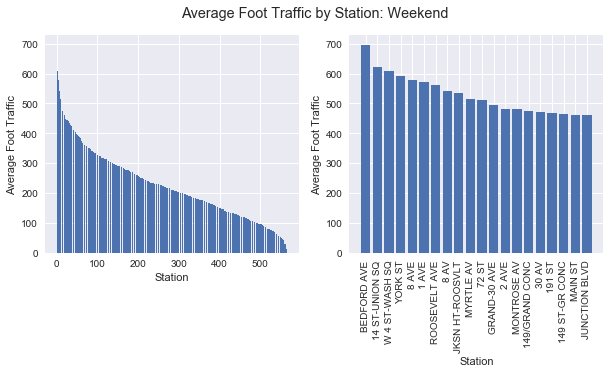

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle("Average Foot Traffic by Station: Weekend", fontsize="large")

mta_weekend_station_names = []
for k,v in mta_weekend_combine_sorted['STATION'].items():
    mta_weekend_station_names.append(v)
plot_one_xticks = mta_weekend_station_names[::50]

ax[0].set_xlabel('Station')
ax[0].set_ylabel('Average Foot Traffic')
plt.sca(ax[0])
plt.xticks(size='small', rotation='horizontal')
stations = range(len(mta_weekend_combine_sorted['STATION']))
foot_traf = mta_weekend_combine_sorted['FOOT_TRAFFIC_AVG']
ax[0].bar(stations, foot_traf);

ax[1].set_xlabel('Station')
ax[1].set_ylabel('Average Foot Traffic')
plt.sca(ax[1])
plt.xticks(range(20), mta_weekend_station_names, size='small', rotation='vertical')
stations = range(20)
foot_traf = mta_weekend_combine_sorted['FOOT_TRAFFIC_AVG'][:20]
ax[1].bar(stations, foot_traf);